In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
import statsmodels.api as sm    #import statsmodels for the stats models
from sklearn.linear_model import LogisticRegression 
import numpy as np
from pandas_confusion import ConfusionMatrix, BinaryConfusionMatrix, Backend

In [29]:
df = pd.read_csv('OnlineNewsPopularity.csv')#read in csv
df.rename(columns=lambda x: x.strip(), inplace=True)#get rid of weird spacing
df = df.set_index('url')#set index as Url (unpredicative)
df = df.drop(['timedelta'], axis=1)#drop timedelta (unpredictive)
FullFeatureSet, shares  = df.drop(['shares'], axis=1), df.shares #seperates features and label

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

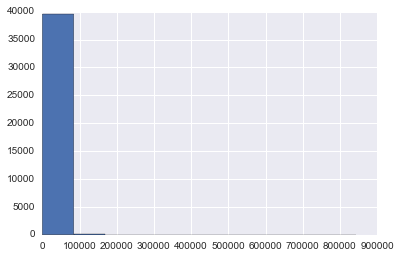

In [30]:
shares.hist()
shares.describe()

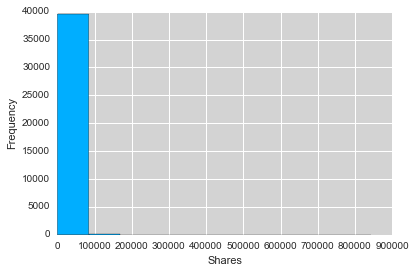

In [72]:
fig, ax = plt.subplots()
df.hist('shares', ax=ax, color='#00aeff')
ax.set_xlabel("Shares")
ax.set_ylabel("Frequency")
ax.set_title('')
ax.set_axis_bgcolor('#d3d3d3')

fig.savefig('SharesFullHist.png')

In [31]:
df['roundedshares'] = np.around(shares, decimals=-2)

In [36]:
print(df.roundedshares.mode())
df.roundedshares.describe()

0    900
dtype: int64


count     39644.000000
mean       3395.663909
std       11626.902468
min           0.000000
25%         900.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: roundedshares, dtype: float64

In [76]:
urls=df[df['shares'] > 10000].index.tolist()   
#for i in df:
#    if i['shares'] > 100000:
nonviral = df.drop(urls)
#nonviralfeatures, nonviralshares = nonviral.drop(['shares'], axis=1), nonviral.shares

count    37459.000000
mean      2029.071785
std       1771.680126
min          0.000000
25%        900.000000
50%       1400.000000
75%       2400.000000
max      10000.000000
Name: roundedshares, dtype: float64

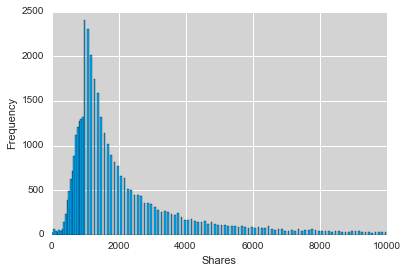

In [77]:
fig, ax = plt.subplots()
nonviral.hist('shares',bins=200, ax=ax, color='#00aeff')
ax.set_xlabel("Shares")
ax.set_ylabel("Frequency")
ax.set_title('')
ax.set_axis_bgcolor('#d3d3d3')

fig.savefig('ShareszoomHist.png')
nonviral.roundedshares.describe()

In [39]:
print(nonviral.roundedshares.mode())
print(nonviral.roundedshares.describe())
print(df.roundedshares.mode())
print(df.roundedshares.describe())

0    900
dtype: int64
count    37459.000000
mean      2029.071785
std       1771.680126
min          0.000000
25%        900.000000
50%       1400.000000
75%       2400.000000
max      10000.000000
Name: roundedshares, dtype: float64
0    900
dtype: int64
count     39644.000000
mean       3395.663909
std       11626.902468
min           0.000000
25%         900.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: roundedshares, dtype: float64


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(FullFeatureSet, binaryshares, test_size=0.30, random_state=4444)


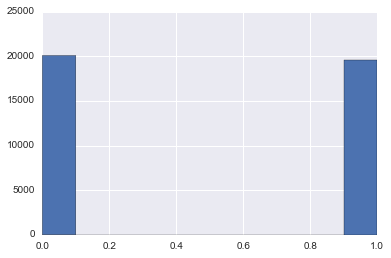

In [46]:
binaryshares.hist()

In [45]:
binaryshares = []
for row in df['shares']:
    if row > 1400:
        binaryshares.append(True)
    else:
        binaryshares.append(False)
df['binaryshares']= binaryshares
binaryshares = df['binaryshares']

In [55]:
viralshares = []
for row in df['shares']:
    if row > 2800:
        viralshares.append(True)
    else:
        viralshares.append(False)
df['viralshares']= viralshares
viralhares = df['viralshares']

In [ ]:
kneighbordict = {}
Xtrain, Xtest, Ytrain, Ytest = train_test_split(FullFeatureSet, binaryshares, test_size=0.30, random_state=4444)
for i in range(1, 31):
    neigh = KNN(n_neighbors=i)
    neigh.fit(Xtrain, Ytrain)
    Ypredict = neigh.predict(Xtest)
    score = accuracy_score(Ytest, Ypredict)
    kneighbordict[i]=score
maxK = (max(kneighbordict, key=kneighbordict.get))
maxaccuracy = (max)

In [ ]:
kneighbordict[maxK]

In [ ]:
x = []
y = []
for i in kneighbordict.values():
    y.append(i)
for i in kneighbordict.keys():
    x.append(i)
plt.scatter(x, y)
plt.scatter(19, 0.58718681688246177, c='r')
    


In [48]:
def modelaccuracy(alg, x, y):
    Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=4444)
    model = alg
    model = model.fit(Xtrain, ytrain)
    ypredict = model.predict(Xtest)
    accuracy = accuracy_score(ytest, ypredict)
    print('Accuracy: ' + str(accuracy))
    print(classification_report(ytest, ypredict))
#     cm = confusion_matrix(np.array(ytest), np.array(ypredict))
#     plot_confusion_matrix(cm)
#     cm = BinaryConfusionMatrix(ytest, ypredict)
#     cm.plot()
#     print('Normalized')
#     cm.plot(normalized=True)


    cm = confusion_matrix(ytest, ypredict)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
    
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names = [True, False]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

#     labels = ['business', 'health']
# cm = confusion_matrix(y_test, pred, labels)
# print(cm)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# pl.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# pl.xlabel('Predicted')
# pl.ylabel('True')
# pl.show()


Accuracy: 0.611989238271
             precision    recall  f1-score   support

      False       0.60      0.71      0.65      5987
       True       0.64      0.51      0.57      5907

avg / total       0.62      0.61      0.61     11894

Confusion matrix, without normalization
[[4255 1732]
 [2883 3024]]
Normalized confusion matrix
[[ 0.71  0.29]
 [ 0.49  0.51]]


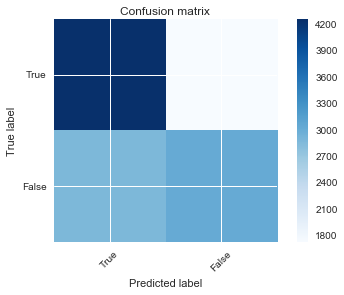

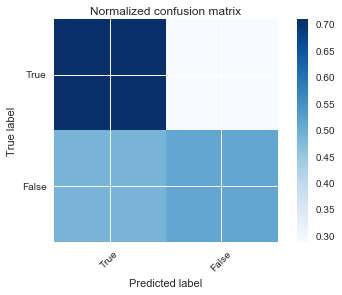

In [91]:
modelaccuracy(RandomForestClassifier(), FullFeatureSet, binaryshares)

Accuracy: 0.665041197242
             precision    recall  f1-score   support

      False       0.66      0.67      0.67      5987
       True       0.67      0.66      0.66      5907

avg / total       0.67      0.67      0.67     11894

Confusion matrix, without normalization
[[4039 1948]
 [2036 3871]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.34  0.66]]


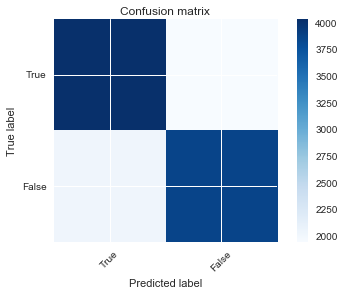

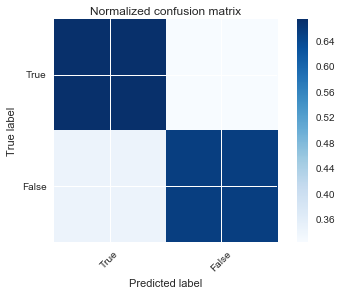

In [89]:
modelaccuracy(RandomForestClassifier(n_estimators=140, min_samples_split=6, min_samples_leaf=7, max_depth=None, max_features=2, bootstrap=False, criterion='gini'), FullFeatureSet, binaryshares)

Accuracy: 0.663359677148
             precision    recall  f1-score   support

      False       0.66      0.67      0.67      5987
       True       0.66      0.65      0.66      5907

avg / total       0.66      0.66      0.66     11894

Confusion matrix, without normalization
[[4021 1966]
 [2038 3869]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.35  0.65]]


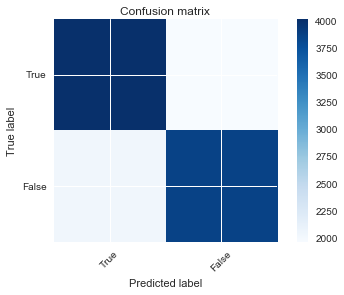

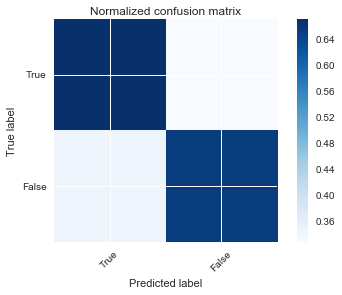

In [49]:
modelaccuracy(RandomForestClassifier(n_estimators=250, max_features=6), FullFeatureSet, binaryshares)

Accuracy: 0.760467462586
             precision    recall  f1-score   support

      False       0.77      0.98      0.86      8988
       True       0.56      0.09      0.15      2906

avg / total       0.72      0.76      0.69     11894

Confusion matrix, without normalization
[[8791  197]
 [2652  254]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.91  0.09]]


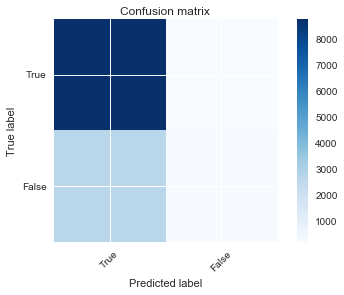

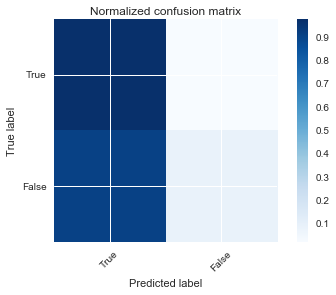

In [56]:
modelaccuracy(RandomForestClassifier(n_estimators=250, max_features=6), FullFeatureSet, viralshares)

Model: KNN
Accuracy: 0.751219102068
             precision    recall  f1-score   support

      False       0.76      0.98      0.86      8988
       True       0.43      0.05      0.09      2906

avg / total       0.68      0.75      0.67     11894

Confusion matrix, without normalization
[[8783  205]
 [2754  152]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.95  0.05]]


Model: Logistic Regression
Accuracy: 0.754918446275
             precision    recall  f1-score   support

      False       0.76      0.98      0.86      8988
       True       0.48      0.05      0.09      2906

avg / total       0.69      0.75      0.67     11894

Confusion matrix, without normalization
[[8838  150]
 [2765  141]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.95  0.05]]


Model: Gaussian NB
Accuracy: 0.751639482092
             precision    recall  f1-score   support

      False       0.76      0.97      0.86      8988
       True       0.45      0.08      0.13      2906

avg / total       0.6

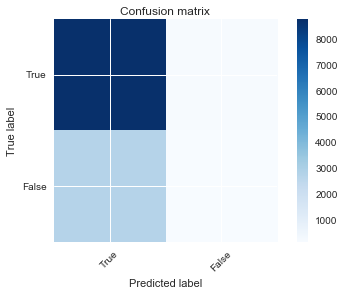

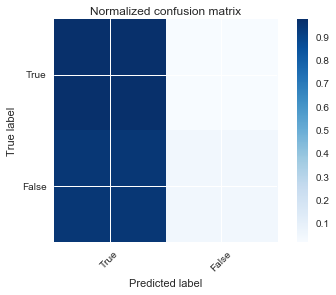

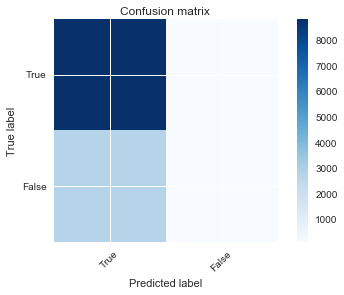

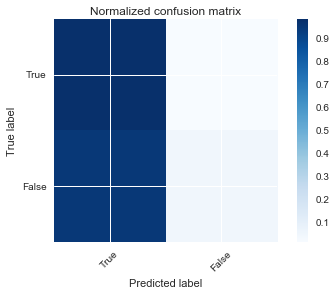

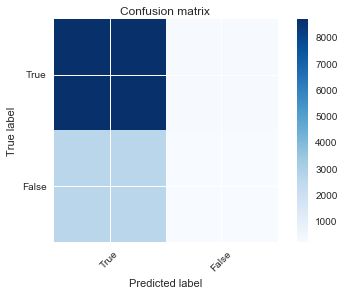

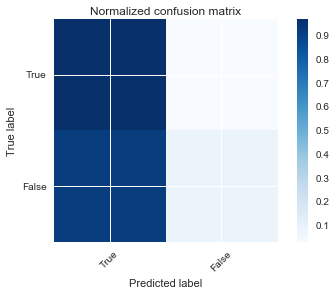

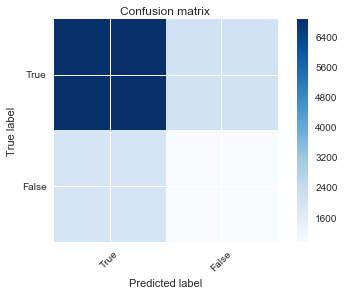

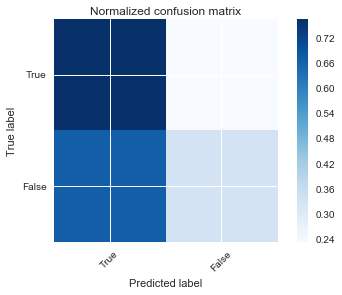

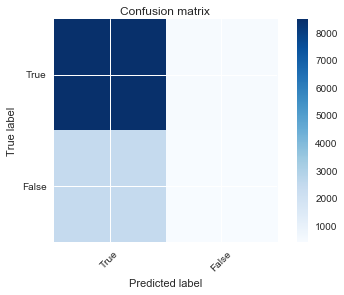

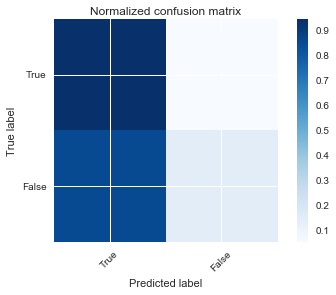

In [57]:
print ('Model: KNN')
modelaccuracy(KNeighborsClassifier(n_neighbors=19), FullFeatureSet, viralshares)
print('\n')
print ('Model: Logistic Regression')
modelaccuracy(LogisticRegression(), FullFeatureSet, viralshares)
print('\n')
print ('Model: Gaussian NB')
modelaccuracy(GaussianNB(), FullFeatureSet,viralshares) 
print('\n')
# print ('Model: SVC')
# modelaccuracy(SVC(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Decision Tree')
modelaccuracy(DecisionTreeClassifier(),FullFeatureSet, viralshares)
print('\n')
print ('Model: Random Forest')
modelaccuracy(RandomForestClassifier(), FullFeatureSet, viralshares)

In [ ]:
print ('Model: Random Forest')
modelaccuracy(RandomForestClassifier(n_estimators=250, max_features=6), FullFeatureSet, binaryshares)

In [ ]:
limitedfeatureset =df[['LDA_02', 'kw_min_avg', 'kw_avg_avg', 'LDA_01', 'LDA_00', 'kw_max_avg', 'LDA_03', 'kw_avg_max', 'LDA_04', 'num_hrefs', 'self_reference_min_shares']]

In [ ]:
print ('Model: KNN')
modelaccuracy(KNeighborsClassifier(n_neighbors=19), limitedfeatureset, binaryshares)
print('\n')
print ('Model: Logistic Regression')
modelaccuracy(LogisticRegression(), limitedfeatureset, binaryshares)
print('\n')
print ('Model: Gaussian NB')
modelaccuracy(GaussianNB(), limitedfeatureset, binaryshares) 
print('\n')
# print ('Model: SVC')
# modelaccuracy(SVC(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Decision Tree')
modelaccuracy(DecisionTreeClassifier(),limitedfeatureset, binaryshares)
print('\n')
print ('Model: Random Forest')
modelaccuracy(RandomForestClassifier(), limitedfeatureset, binaryshares)

In [ ]:
# # Recursive Feature Elimination

# from sklearn.feature_selection import RFE
# # create a base classifier used to evaluate a subset of attributes
# model = LogisticRegression()
# # create the RFE model and select 3 attributes
# rfe = RFE(model, 3)
# rfe = rfe.fit(FullFeatureSet, binaryshares)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

In [ ]:
#linear regression with logshares (linelog)
#logshares = np.log10(Shares)
#linelogXtrain, linelogXtest, linelogYtrain, linelogYtest = train_test_split(FullFeatureSet, logshares, test_size=0.30, random_state=4444)
#linelogmodel = sm.OLS(linelogYtrain, linelogXtrain).fit()
#test = linelogmodel.predict(linelogXtest)
#test.summary()

In [8]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time
from operator import itemgetter

In [22]:
clf = RandomForestClassifier(n_estimators = 250)
X = FullFeatureSet
y = binaryshares

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(score.mean_validation_score, np.std(score.cv_validation_scores)))
        print("Paramaters: {0}".format(score.parameters))
        print("")

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)



print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))report(grid_search.grid_scores_)


RandomizedSearchCV took 861.67 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.659 (std: 0.021)
Paramaters: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_depth': None, 'max_features': 2, 'bootstrap': False, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.657 (std: 0.022)
Paramaters: {'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': None, 'max_features': 4, 'bootstrap': True, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.656 (std: 0.019)
Paramaters: {'min_samples_split': 5, 'min_samples_leaf': 9, 'max_depth': None, 'max_features': 7, 'bootstrap': False, 'criterion': 'gini'}



KeyboardInterrupt: 

In [23]:
import xgboost as xgb
from xgboost import XGBClassifier

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(FullFeatureSet, binaryshares, test_size=0.30, random_state=4444)
gbm = XGBClassifier(n_estimators = 200).fit(Xtrain, ytrain)
ypredict = gbm.predict(Xtest)
accuracy = accuracy_score(ytest, ypredict)
print('Accuracy: ' + str(accuracy))
print(classification_report(ytest, ypredict))
gbm200predictions = ypredict

Accuracy: 0.669160921473
             precision    recall  f1-score   support

      False       0.66      0.61      0.63      5544
       True       0.68      0.72      0.70      6350

avg / total       0.67      0.67      0.67     11894



In [27]:
clf = XGBClassifier(n_estimators = 250)
X = FullFeatureSet
y = binaryshares

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(score.mean_validation_score, np.std(score.cv_validation_scores)))
        print("Paramaters: {0}".format(score.parameters))
        print("")

param_dist = {"max_depth": [5, 4, 3, 2, 1],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),


#n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)



print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))report(grid_search.grid_scores_)

SyntaxError: invalid syntax (<ipython-input-27-24181c0faa5b>, line 20)